In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime


import sys
sys.path.append("/home/kieran/code/Ant-mel/legendary_game_recs/")

#from legendary_game_recs.preprocessing import preprocess_1_cleaning

from preprocessing.preprocess import *

In [15]:
def drop_duplicates(df):
    df.sort_values('title')
    return df.drop_duplicates()
    

def delete_no_release_date(df):
    return df[df['release_date'] != "null"]

def cleaning_in_notebook(df):
    numeric_columns = ['plays','playing','backlogs','wishlist','total_reviews','total_lists']
    string_columns = ['developers','genres','platforms']
    df = date_reformatted(df, 'release_date')
    df[string_columns] = make_list_columns_to_lists(df, string_columns)
    for x in numeric_columns:
        numeric_objects_reformatted(df, x)
    df = delete_no_release_date(df)
    df['plays'] = np.where(df['plays'] < 0, 0, df['plays'])
    return df
    

In [16]:
df = pd.read_csv("../raw_data/all_game_data_v1.csv", low_memory=False)

df.head()

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url
0,PilotXross,2030-12-20,1,0,2,2,['PilotXross'],0.0,"['Indie', 'Racing', 'Sport']",['SteamVR'],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/pilotxross/
1,Plague Hunter,2029-02-07,0,0,2,7,[],0.0,"['Adventure', 'Indie']",['Windows PC'],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/plague-hunter/
2,The God Slayer,2027-12-31,0,0,1,8,['Pathea Games'],0.0,['RPG'],['PlayStation 5'],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-god-slayer/
3,Tales of the Death,2025-12-31,0,0,0,4,"['8 Million Bit', 'Hanoi Studios']",0.0,[],['Windows PC'],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tales-of-the-d...
4,Riversiders,2025-12-31,1,0,0,0,[],0.0,"['Adventure', 'Racing']",['Windows PC'],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/riversiders/


In [17]:
df = drop_duplicates(df)

In [18]:
df = cleaning_in_notebook(df)

/tmp/ipykernel_10414/1742687020.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['plays'] = np.where(df['plays'] < 0, 0, df['plays'])


In [19]:
df.sort_values('release_date')

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url
106657,Star Trader,01/01/1974,5,0,5,0,[Peoples Computer Company],0.0,[Simulator],[HP 2100],...,0,1,0,0,0,1,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/star-trader/
106630,Ace,01/01/1976,1,0,1,0,[Allied Leisure Industries],0.0,"[Arcade, Shooter]",[Arcade],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/ace--1/
106629,Demolition Derby,01/01/1976,1,0,3,0,"[Chicago Coin, Exidy]",0.0,[Arcade],[Arcade],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/demolition-der...
106417,Space King,01/01/1979,1,0,1,0,"[Konami, Leijac]",0.0,[],[Arcade],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/space-king/
106303,Catch the Ball / Noughts and Crosses,01/01/1980,0,0,1,0,[Philips],0.0,"[Arcade, Puzzle]",[Philips Videopac G7000],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/catch-the-ball...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,Rise of Rebellion,12/31/2025,0,0,0,2,[KODANSHA],0.0,[Adventure],[Windows PC],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/rise-of-rebell...
3,Tales of the Death,12/31/2025,0,0,0,4,"[8 Million Bit, Hanoi Studios]",0.0,[],[Windows PC],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/tales-of-the-d...
9,ExeKiller,12/31/2025,0,0,7,47,[Paradark Studio],0.0,"[Adventure, Indie, Shooter]",[Windows PC],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/exekiller/
7,Penny Blood,12/31/2025,1,0,24,119,[],0.0,[RPG],"[Windows PC, PlayStation 5, Xbox Series]",...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/penny-blood/


In [20]:
df[df['plays'] == -1]

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url


In [21]:
df[df['title'] == 'Mytran Wars']

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url
79863,Mytran Wars,04/17/2009,0,0,1,2,[],0.0,[Strategy],[PlayStation Portable],...,0,0,0,0,0,0,0,0,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/mytran-wars/


In [23]:
df.sort_values('plays', ascending=False).head(20)

,title,release_date,plays,playing,backlogs,wishlist,developers,avg_review,genres,platforms,...,ratings_one_five,ratings_two_zero,ratings_two_five,ratings_three_zero,ratings_three_five,ratings_four_zero,ratings_four_five,ratings_five_zero,image,url
73167,Minecraft,11/18/2011,46000,2700,1500,292,[Mojang Studios],4.3,"[Adventure, Simulator]","[Windows PC, Mac, Linux]",...,103,341,628,1926,3103,6399,4565,11648,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/minecraft/
68225,Grand Theft Auto V,09/17/2013,42000,1200,4600,895,"[Rockstar North, Rockstar Games]",3.8,"[Adventure, Racing, Shooter]","[Windows PC, Xbox 360, PlayStation 4, PlayStat...",...,216,663,1201,3267,5058,7537,4495,3979,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/grand-theft-au...
51512,The Legend of Zelda: Breath of the Wild,03/03/2017,42000,3500,6600,3400,"[Nintendo EPD Production Group No. 3, Nintendo]",4.4,"[Adventure, Puzzle, RPG]","[Wii U, Nintendo Switch]",...,118,324,527,1173,2070,4937,6550,13140,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/the-legend-of-...
74620,Portal 2,04/18/2011,40000,723,6000,1600,"[Electronic Arts, Valve]",4.4,"[Adventure, Platform, Puzzle, Shooter]","[Windows PC, Mac, Xbox 360, Linux, PlayStation...",...,29,88,189,750,1824,5506,6222,10396,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/portal-2/
60375,Undertale,09/15/2015,37000,886,7100,2500,"[tobyfox, 8-4]",4.3,"[Adventure, Indie, RPG, Turn Based Strategy]","[Windows PC, Mac, Linux, PlayStation 4, Xbox O...",...,159,360,502,1401,2392,5310,5244,9259,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/undertale/
42058,Among Us,06/15/2018,34000,521,1000,153,[Innersloth],3.0,"[Indie, Strategy]","[Windows PC, Android, PlayStation 4, iOS, Xbox...",...,560,1593,2864,5763,3705,2590,471,1068,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/among-us/
38698,Super Smash Bros. Ultimate,12/07/2018,34000,1500,1500,1000,"[Bandai Namco Studios, Nintendo]",4.1,"[Fighting, Platform]",[Nintendo Switch],...,83,253,487,1624,2882,5842,4581,4259,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/super-smash-br...
46750,Super Mario Odyssey,10/27/2017,34000,982,4200,2700,[Nintendo],4.2,"[Adventure, Platform]",[Nintendo Switch],...,70,205,377,1260,2375,5562,5882,6163,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/super-mario-od...
51671,Hollow Knight,02/24/2017,30000,3200,12000,3100,[Team Cherry],4.4,"[Adventure, Indie, Platform]","[Windows PC, Mac, Linux, Nintendo Switch]",...,101,286,382,862,1338,3191,4233,9286,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/hollow-knight/
38713,Hades,12/07/2018,30000,4000,8800,4700,[Supergiant Games],4.3,"[Adventure, Brawler, Indie, RPG]","[Windows PC, Mac, PlayStation 4, Xbox One, Pla...",...,47,187,267,1002,1956,5040,5084,6808,https://images.igdb.com/igdb/image/upload/t_co...,https://www.backloggd.com/games/hades--1/


In [25]:
df[['title','total_reviews','total_lists']].sort_values('total_reviews', ascending=False).head(20)

,title,total_reviews,total_lists
51512,The Legend of Zelda: Breath of the Wild,3800,5800
13456,Elden Ring,3700,5300
73167,Minecraft,3400,3000
60375,Undertale,3000,4400
42058,Among Us,3000,1100
51671,Hollow Knight,2700,3900
2861,The Legend of Zelda: Tears of the Kingdom,2600,3100
38713,Hades,2500,3600
46750,Super Mario Odyssey,2400,3900
74620,Portal 2,2400,3900


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98205 entries, 0 to 109755
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               98205 non-null  object 
 1   release_date        98205 non-null  object 
 2   plays               98205 non-null  int64  
 3   playing             98205 non-null  int64  
 4   backlogs            98205 non-null  int64  
 5   wishlist            98205 non-null  int64  
 6   developers          98205 non-null  object 
 7   avg_review          98205 non-null  float64
 8   genres              98205 non-null  object 
 9   platforms           98205 non-null  object 
 10  description         93345 non-null  object 
 11  total_reviews       98205 non-null  int64  
 12  total_lists         98205 non-null  int64  
 13  category            98205 non-null  object 
 14  main                98205 non-null  object 
 15  ratings_zero_five   98205 non-null  int64  
 16  rat

<AxesSubplot:xlabel='plays', ylabel='Count'>

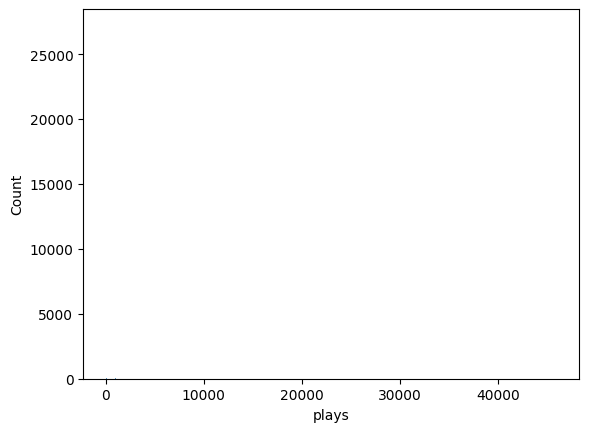

In [27]:
import seaborn as sns

sns.histplot(data = df, x = 'plays')

<AxesSubplot:xlabel='avg_review'>

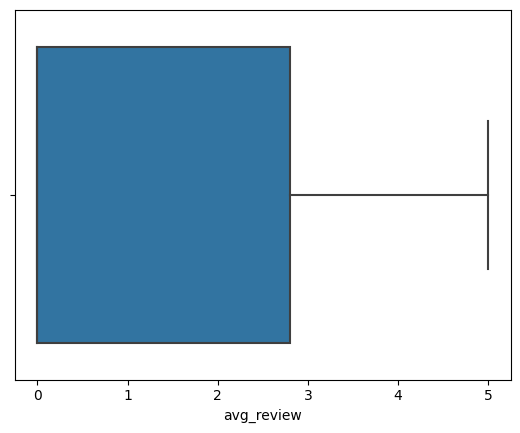

In [28]:
sns.boxplot(data = df, x = 'avg_review')

In [32]:
df.value_counts("total_reviews")

total_reviews
0       64692
1       12620
2        4922
3        2744
4        1824
        ...  
523         1
524         1
265         1
528         1
3800        1
Length: 596, dtype: int64